<a href="https://colab.research.google.com/github/pabloalfaro/drl-grid/blob/main/pruebas/grid2op.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
# !pip install grid2op[optional]  # Para ejecutar el código en Colab

In [38]:
# !pip install jyquickhelper # Para ejecutar el código en Colab

In [ ]:
import os
import sys
import grid2op

In [ ]:
# import the usefull classes
import numpy as np
import shutil
from tqdm.notebook import tqdm  # for easy progress bar

from grid2op import make
from grid2op.Agent import DoNothingAgent

max_iter = 50 # Se consideran 50 iteraciones para que sea más rápido
train_iter = 50
max_eval_step = 20
env_name = "rte_case14_redisp"
env = make(env_name, test=False)
env.seed(0)  # Una semilla para que los agentes sean reproducibles
my_agent = DoNothingAgent(env.action_space)
my_agent.seed(0)  # Semilla para que las acciones del agente sean las mismas

((0,), (0,))

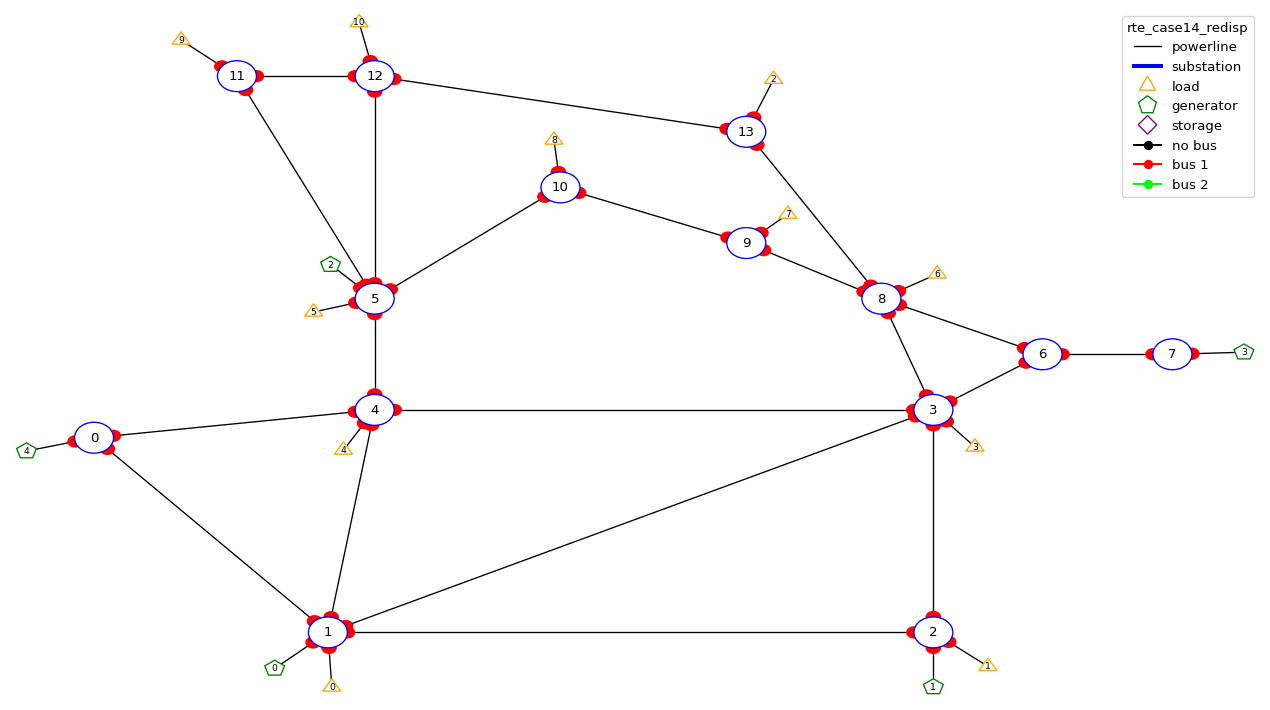

In [ ]:
from grid2op.PlotGrid import PlotMatplot

plot_helper = PlotMatplot(env.observation_space)
_ = plot_helper.plot_layout()

In [ ]:
display_tqdm = True

all_obs = []
obs = env.reset()
all_obs.append(obs)
reward = env.reward_range[0]
done = False
nb_step = 0
with tqdm(total=env.chronics_handler.max_timestep(), disable=not display_tqdm) as pbar:
    while True:
        action = my_agent.act(obs, reward, done)
        obs, reward, done, _ = env.step(action)
        pbar.update(1)
        if done:
            break
        all_obs.append(obs)
        nb_step += 1

  0%|          | 0/8064 [00:00<?, ?it/s]

In [ ]:
print("Number of timesteps computed: {}".format(nb_step))
print("Total maximum number of timesteps possible: {}".format(env.chronics_handler.max_timestep()))

Number of timesteps computed: 8063
Total maximum number of timesteps possible: 8064


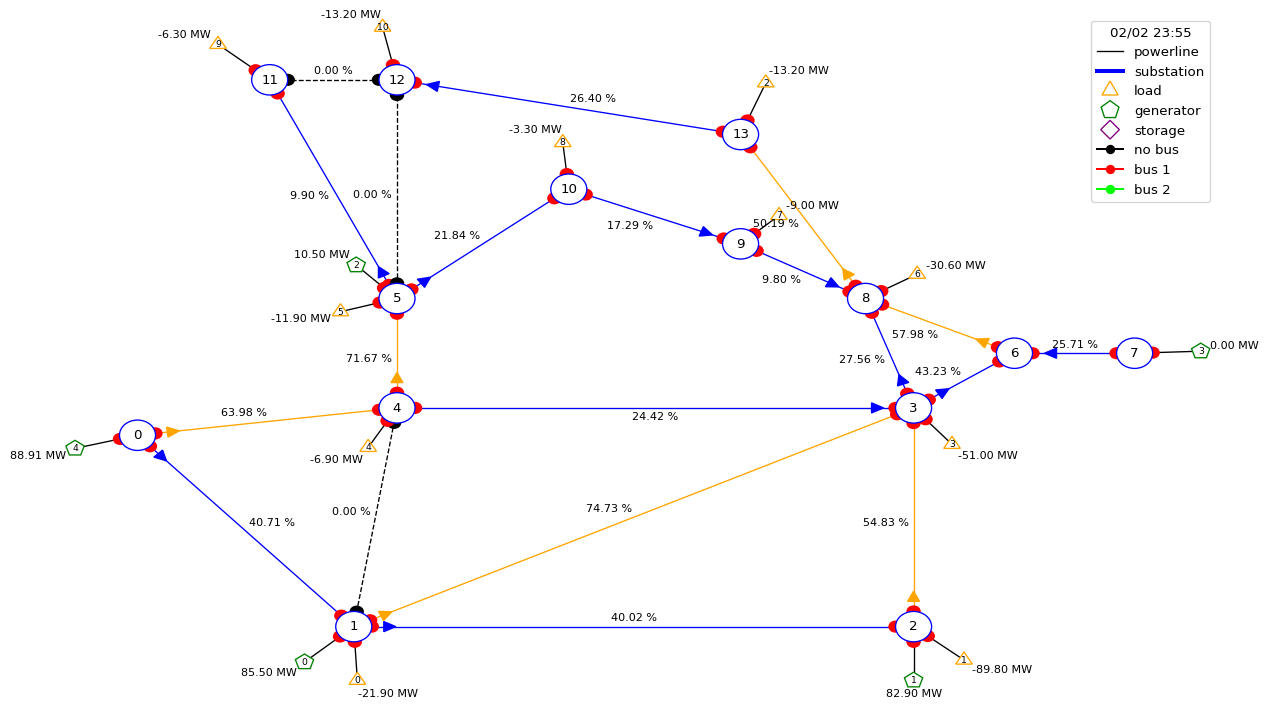

In [ ]:
_ = plot_helper.plot_obs(all_obs[-1])

In [ ]:
from grid2op.Agent import RandomAgent 

my_r_agent =  RandomAgent(env.action_space)
my_r_agent.seed(10)

In [ ]:
display_tqdm = True

all_obs = []
obs = env.reset()
all_obs.append(obs)
reward = env.reward_range[0]
done = False
nb_step = 0
with tqdm(total=env.chronics_handler.max_timestep(), disable=not display_tqdm) as pbar:
    while True:
        action = my_r_agent.act(obs, reward, done)
        obs, reward, done, _ = env.step(action)
        pbar.update(1)
        if done:
            break
        all_obs.append(obs)
        nb_step += 1

  0%|          | 0/8064 [00:00<?, ?it/s]

In [ ]:
print("Number of timesteps computed: {}".format(nb_step))
print("Total maximum number of timesteps possible: {}".format(env.chronics_handler.max_timestep()))

Number of timesteps computed: 5
Total maximum number of timesteps possible: 8064


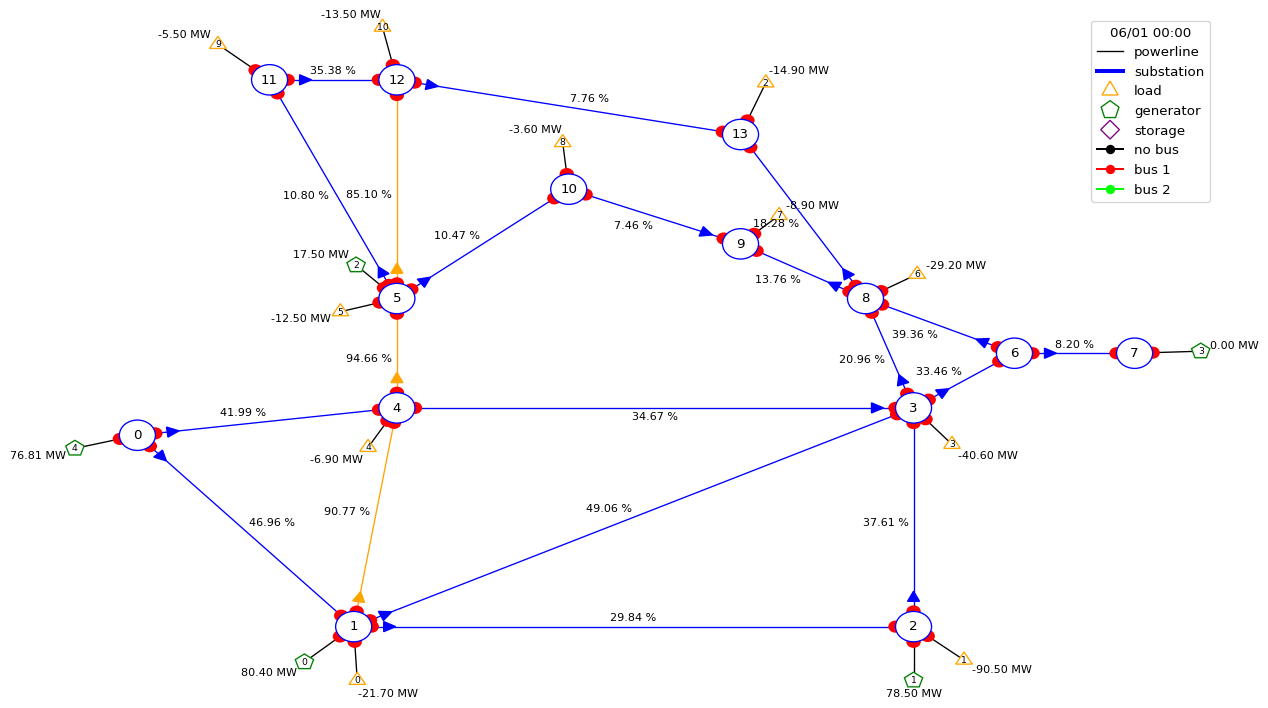

In [ ]:
_ = plot_helper.plot_obs(all_obs[0])

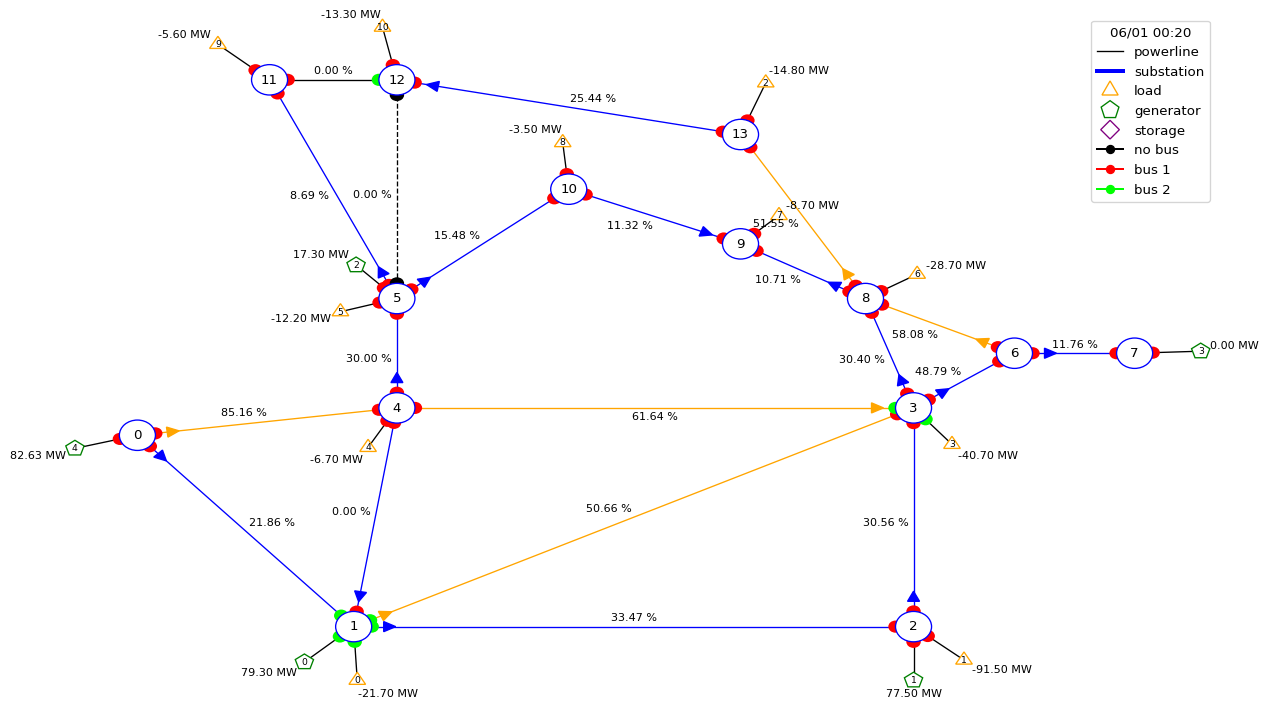

In [ ]:
_ = plot_helper.plot_obs(all_obs[-2])